In [ ]:
# necessary python packages
# !pip3 install numpy==1.24 arviz matplotlib astor tqdm numba pymc

In [1]:
# general imports
import time
from typing import List
import numpy as np
import arviz as az
from matplotlib import pyplot as plt
from scipy.stats import norm
import src as exact_inference

# Case study

We consider a data analyst that releases average statistics on population income for different age groups and genders. We consider a database of incomes for 40 individuals (in different ages and genders). We use the Privug method to quantify attacker knowledge regarding the income of first individual in the database. See accompaying paper for more information.

## Release of public statistics

The files `eval.py` (case 1), `eval2.py` (case 2) and `eval3.py` in the folder `case_study_files` contain the prior attacker knowledge for all individuals in the database, and the program to compute.

The cell below shows how to use our novel exact Bayesian inference engine to compute the complete posterior distribution, i.e., the posterior attacker knowledge for all the individuals in the dataset.

In [2]:
posterior_case_1 = exact_inference.infer("case_study_files/eval.py")
posterior_case_2 = exact_inference.infer("case_study_files/eval2.py")
posterior_case_3 = exact_inference.infer("case_study_files/eval3.py")

The cell below stores the information about the first individual of the database from the posterior distribution.

In [3]:
prior_mean_male_21_30 = 480_000
prior_variance_male_21_30 = 100

posterior_mean_male_21_30_case_1 = posterior_case_1[0][0]
posterior_variance_male_21_30_case_1 = posterior_case_1[1][0,0]

posterior_mean_male_21_30_case_2 = posterior_case_2[0][0]
posterior_variance_male_21_30_case_2 = posterior_case_2[1][0,0]

posterior_mean_male_21_30_case_3 = posterior_case_3[0][0]
posterior_variance_male_21_30_case_3 = posterior_case_3[1][0,0]

In [5]:
posterior_mean_male_21_30_case_1

480250.0

The cell below computes the left side of Figure 3 in the accompying paper.

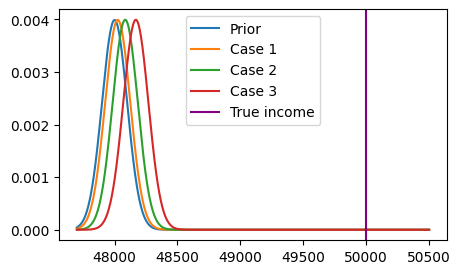

In [14]:
scale = lambda x : x/10
gen_y_case = lambda x, mean, variance : norm(loc=scale(mean),scale=variance).pdf(x)

x = np.linspace(scale(prior_mean_male_21_30)-3*prior_variance_male_21_30,scale(505_000), 1000)

y_prior  = gen_y_case(x,prior_mean_male_21_30,prior_variance_male_21_30)
y_case_1 = gen_y_case(x,posterior_mean_male_21_30_case_1,posterior_variance_male_21_30_case_1)
y_case_2 = gen_y_case(x,posterior_mean_male_21_30_case_2,posterior_variance_male_21_30_case_2)
y_case_3 = gen_y_case(x,posterior_mean_male_21_30_case_3,posterior_variance_male_21_30_case_3)

fig, axs = plt.subplots(1, 1, figsize=(5, 3))

axs.plot(x,y_prior,  label='Prior')
axs.plot(x,y_case_1, label='Case 1')
axs.plot(x,y_case_2, label='Case 2')
axs.plot(x,y_case_3, label='Case 3')
axs.axvline(x = scale(500_000), color = 'purple', label= 'True income')
axs.legend();

## Release of public statistics with differential privacy

Now we turn our attention to the second part of our case study. The use of the Gaussian differential privacy mechanism to enhance individual's privacy. The files `eval_dp.py` (case 1), `eval2_dp.py` (case 2) and `eval3_dp.py` in the folder `case_study_files` contain the prior attacker knowledge for all individuals in the database, and the program to compute.

The cell below shows how to use our novel exact Bayesian inference engine to compute the complete posterior distribution, i.e., the posterior attacker knowledge for all the individuals in the dataset.

In [ ]:
posterior_case_1_dp = exact_inference.infer("case_study_files/eval_dp.py")
posterior_case_2_dp = exact_inference.infer("case_study_files/eval2_dp.py")
posterior_case_3_dp = exact_inference.infer("case_study_files/eval3_dp.py")

The cell below stores the information about the first individual of the database from the posterior distribution.

In [ ]:
posterior_mean_male_21_30_case_1_dp = posterior_case_1_dp[0][0]
posterior_variance_male_21_30_case_1_dp = posterior_case_1_dp[1][0,0]

posterior_mean_male_21_30_case_2_dp = posterior_case_2_dp[0][0]
posterior_variance_male_21_30_case_2_dp = posterior_case_2_dp[1][0,0]

posterior_mean_male_21_30_case_3_dp = posterior_case_3_dp[0][0]
posterior_variance_male_21_30_case_3_dp = posterior_case_3_dp[1][0,0]

The cell below computes the left side of Figure 3 in the accompying paper.

In [ ]:
y_case_1_dp = gen_y_case(x,posterior_mean_male_21_30_case_1_dp,posterior_variance_male_21_30_case_1_dp)
y_case_2_dp = gen_y_case(x,posterior_mean_male_21_30_case_2_dp,posterior_variance_male_21_30_case_2_dp)
y_case_3_dp = gen_y_case(x,posterior_mean_male_21_30_case_3_dp,posterior_variance_male_21_30_case_3_dp)

fig, axs = plt.subplots(1, 1, figsize=(5, 3))

axs.plot(x,y_prior,  label='Prior')
axs.plot(x,y_case_1_dp, label='Case 1 DP')
axs.plot(x,y_case_2_dp, label='Case 2 DP')
axs.plot(x,y_case_3_dp, label='Case 3 DP')
axs.axvline(x = scale(500_000), color = 'purple', label= 'True income')
axs.legend();

# Scalability

In this section, we perform the scalability evaluation in two synthetic benchmark programs.  As the scalability of Bayesian inference engines mainly depends on the number of random variables, we consider two synthetic benchmark programs with increasing number of variables.

The folder `scalability_files` contains the programs to evaluate. They are templates that are instantiated with to increase the number of variables that the program uses.

## Synthetic program 1

The first benchmark computes the a sum over an increasing number of variables $O = \sum_i X_i$. We choose this benchmark as it was originally used to measure the scalability of Privug [[1]](https://arxiv.org/abs/2011.08742). We compare the scalability of our engine to Privug using the NUTS sampler and the exact inference engine Psi. The goal of the benchmark is to observe the scalability of the different methods as the number of random variables in the program increases.

### Details of the Privug MCMC setting

We instruct NUTS to draw 10000 samples in 2 chains—it was shown that this number of samples produces an accurate posterior in this benchmark [[1]](https://arxiv.org/abs/2011.08742). The program is hardcoded as PyMC model in the function `def time_privug_nuts(size)` in the `utils/eval.py`.

### Details of the Psi setting

The program `eval_psi_scale.psi.template` uses arrays to first create all the random variables that the program uses and the perform the summation. This is because Psi differentiates between `:=` (introduces a new random variable) and `=` (replaces an existing random variable). If we implement the Psi program using `=` then the program will contain only 1 random variable, and we would not be testing the scalability of Psi as the number of random variables increases.  The Psi program using only one random variable with `=` would be faster than our inference engine－although it would contain strictly less information as it would miss the other random variables with the attacker knowledge of other individuals. This information is often needed when computing quantitative information flow metrics.

To execute this part of the evaluation you must make sure that you have installed the [Psi solver](https://psisolver.org/).

First we import the utilities for evaluation

In [ ]:
# Utilities for running the scalability evaluation
from utils.eval import *

Here we define an array with the number of variables that we will evaluate.

In [ ]:
NUM_VARS = [100, 200, 300, 400, 500, 600, 700][:4] # only the first 2 for testing

Now we compute the running time for all methods.

In [ ]:
times_gauss       = [time_gauss(size,SYNTH1_TEMPLATE_GAUSS) for size in NUM_VARS]
times_psi         = [time_psi(size,SYNTH1_TEMPLATE_PSI)     for size in NUM_VARS]
times_privug_nuts = [time_privug_nuts(size)                 for size in NUM_VARS]

We generate a plot comparing the running times. It corresponds Figure 4 (left) in the accompanying paper.

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(7,4))
axs.plot(NUM_VARS,times_gauss,'-o',label='Privug exact')
axs.plot(NUM_VARS,times_privug_nuts,'-o',label='Privug NUTS')
axs.plot(NUM_VARS,times_psi,'-o',label='PSI')
axs.legend();

### Further scalability of our engine

Now we check the scalability for larger number of random variables. We do not include the other methods as they already showed lower scalability in the previous measurements.

In [ ]:
NUM_VARS_2 = [1000, 3000, 5000, 7000, 10000, 20000, 30000]

Now we compute the running times.

In [ ]:
times_gauss_2 = [time_gauss(size,SYNTH1_TEMPLATE_GAUSS) for size in NUM_VARS_2_1]

We generate a plot showing the running times. It corresponds Figure 4 (middle) in the accompanying paper.

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(7,4))
axs.plot(NUM_VARS_2,times_gauss_2,'-o',label='Privug exact')
axs.legend();

## Scalability synthetic program 2 (with condition)

The second benchmark computes the same sum as above but it also conditions the outuput: $O = \sum_i X_i \texttt{; condition}(O,c)$. We choose this benchmark to study scalability in the same setting as our case study.

Here we define an array with the number of variables that we will evaluate.

In [ ]:
NUM_VARS_3 = NUM_VARS+[1000, 2000, 3000, 4000, 5000]

Now we compute the running times.

In [ ]:
times_gauss_3 = [time_gauss(size,SYNTH2_TEMPLATE_GAUSS) for size in NUM_VARS_3]

We generate a plot showing the running times. It corresponds Figure 4 (right) in the accompanying paper.

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(7,4))
axs.plot(NUM_VARS_3,times_gauss_3,'-o',label='Privug exact')
axs.legend();